In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation
from matplotlib import patches 
from matplotlib import colors 
from matplotlib import cm

In [2]:
spectra_location = '../Fibre Design/Single Shot Data/16_02_23/spectra/'
wavelengths_list_of_list = []
intensities_list_of_list = []
labels = ["%.2d" % i for i in range(15)]
for n in labels:
    print(n)
    spectra_n = pd.read_csv(spectra_location+'nath_16_02_{}.CSV'.format(n), skiprows=39, names=['Wavelength', 'Intensity'])
    wavelengths_list_of_list.append(spectra_n.Wavelength.to_numpy())
    intensities_list_of_list.append(spectra_n.Intensity.to_numpy())


00
01
02
03
04
05
06
07
08
09
10
11
12
13
14


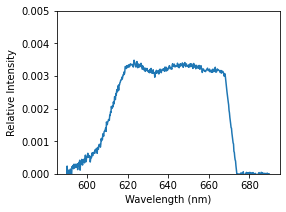

In [3]:

spectra_flat = pd.read_csv('../Fibre Design/Single Shot Data/nathan_flat_spectra_7_11.CSV', skiprows=39, names=['Wavelength', 'Intensity'])
wvlns_flat = spectra_flat.Wavelength.to_numpy()
intensities_flat = spectra_flat.Intensity.to_numpy()

intensities_flat = intensities_flat/np.sum(intensities_flat)

fig_flat = plt.figure(figsize=(4,3))
ax_flat = fig_flat.add_subplot(111)

ax_flat.plot(wvlns_flat, intensities_flat)
# ax_flat.set_xlim(700,800)
ax_flat.set_xlabel('Wavelength (nm)')
ax_flat.set_ylabel('Relative Intensity')
ax_flat.set_ylim(0,0.005)
# fig_flat.savefig('Flat intensity spectra from osa.svg', dpi=300)

plt.show()

In [4]:
id_vals = pd.read_csv('../Fibre Design/Single Shot Data/24_01_23/Id Data/18.5cm ID values Core 6.csv')
id_vals.set_index('Rotations', drop=True, inplace=True)
id_vals.head()


,Id,Unweighted
Rotations,,
0,1.367351,0.263207
1,1.394471,0.265942
2,1.471789,0.287760
3,1.508541,0.290912
4,1.443113,0.249473


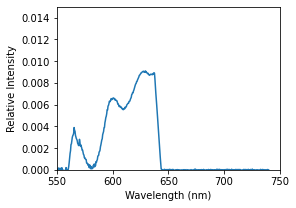

In [5]:
fig_spectra = plt.figure(figsize=(4,3))
ax_spectra = fig_spectra.add_subplot(111)

ax_spectra.plot(wavelengths_list_of_list[-1], intensities_list_of_list[-1]/np.sum(intensities_list_of_list[-1]))
ax_spectra.set_xlim(550,750)
ax_spectra.set_xlabel('Wavelength (nm)')
ax_spectra.set_ylabel('Relative Intensity')
ax_spectra.set_ylim(0,0.015)
# fig_spectra.savefig('sloped intensity spectra from osa.svg', dpi=300)

plt.show()

In [6]:

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

def make_video(wavelength_list, intensities_list, fname, frame_no):#, id_df):
    fig = plt.figure()
    fig.set_dpi(800)
    fig.set_size_inches(6, 4)

    ax = plt.axes(xlim=(550, 750), ylim=(np.min(intensities_list), np.max(intensities_list)+1e-6))

    def init():
        ax.plot(wavelength_list[0], intensities_list[0])
        # ax.set_title('0 Rotations')#, Winding: {}, Unweighted: {}'.format(id_df.Id[0],id_df.Unweighted[0]))
        ax.set_xlabel('Wavelength (nm)', fontsize=12)
        ax.set_ylabel('Intensity (arb)', fontsize=12)
        ax.yaxis.set_major_formatter(formatter) 

    def animate(i):
        ax.clear()
        # ax = plt.axes(xlim=(500, 800), ylim=(min(intensities_list), max(intensities_list)))
        ax.plot(wavelength_list[i], intensities_list[i])
        # ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
        ax.set_xlim([550, 750])
        ax.set_ylim([np.min(intensities_list), np.max(intensities_list)+1e-6])
        ax.set_xlabel('Wavelength (nm)', fontsize=12)
        ax.set_ylabel('Intensity (arb)', fontsize=12)
        ax.yaxis.set_major_formatter(formatter) 

    anim = animation.FuncAnimation(fig, animate, 
                                init_func=init, 
                                frames=frame_no, 
                                interval=3000,
                                blit=False,
                                save_count=frame_no,
                                repeat=True)
    writervideo = animation.FFMpegWriter(fps=1)
    
    plt.axis('off')
    anim.save('../Propagation Videos/'+fname, writer=writervideo)
    
    plt.close()
    return 

In [7]:

make_video(wavelengths_list_of_list, intensities_list_of_list, 'spectra_change_16_02_new.mp4', 14)#, id_vals)

In [8]:
from scipy.optimize import curve_fit
import pylab
import matplotlib
color_theme = ['#E3170A','#A9E5BB','#FCF6B1','#F7B32B','#2D1E2F']

params = {'legend.fontsize': 10,#'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 10,#'x-large',
         'axes.titlesize':10,#'x-large',
         'xtick.labelsize':10,#18,
         'ytick.labelsize':10}#18}
          
pylab.rcParams.update(params)
matplotlib.rcParams['font.family'] = ['sans-serif']
matplotlib.rcParams['font.sans-serif']='Arial'

In [9]:
set_1_df = pd.read_csv('../Fibre Design/Single Shot Data/16_02_23/23.7cm 16_02_23 ID values set 1.csv', skiprows=0)# orig label.csv', skiprows=0)
set_1_df.set_index('Rotations', inplace=True)
set_2_df = pd.read_csv('../Fibre Design/Single Shot Data/16_02_23/23.7cm 16_02_23 ID values set 2.csv', skiprows=0)# orig label.csv', skiprows=0)
set_2_df.set_index('Rotations', inplace=True)
set_3_df = pd.read_csv('../Fibre Design/Single Shot Data/16_02_23/23.7cm 16_02_23 ID values set 3.csv', skiprows=0)# orig label.csv', skiprows=0)
set_3_df.set_index('Rotations', inplace=True)

combined = (set_1_df.Id.to_numpy() + set_2_df.Id.to_numpy() + set_3_df.Id.to_numpy())/3
combining = [set_1_df.Id.to_numpy(), set_2_df.Id.to_numpy(), set_3_df.Id.to_numpy()]

combined_unweight = (np.abs(set_1_df.Unweighted.to_numpy()) + np.abs(set_2_df.Unweighted.to_numpy()) + np.abs(set_3_df.Unweighted.to_numpy()))/3
# display(set_3_df)
# display(combined_unweight)
print(np.mean(combining,axis=0))
print(np.std(combining,axis=0))
print(combined_unweight)

[1.1065464  1.12585323 1.11543462 1.38257871 1.24938131 1.22143024
 1.26985809 1.2096763  1.10687683 1.14872428 1.0083348  1.0460553
 1.10457957 0.99675239 0.98288193]
[0.05150124 0.03919482 0.03240002 0.02412177 0.13342341 0.03341282
 0.1213384  0.06301352 0.03472205 0.04300514 0.03432745 0.02213977
 0.01378103 0.1067405  0.06163552]
[0.01701058 0.0214394  0.01993688 0.0344612  0.06273876 0.02012443
 0.06205745 0.13901796 0.13193309 0.13747224 0.13510993 0.19614082
 0.21218613 0.16189854 0.18290181]


In [10]:
spectra_location = '../Fibre Design/Single Shot Data/16_02_23/spectra/'
wavelengths_list_of_list = []
intensities_list_of_list = []
labels = ["%.2d" % i for i in range(15)]
for n in labels:
    print(n)
    spectra_n = pd.read_csv(spectra_location+'nath_16_02_{}.CSV'.format(n), skiprows=39, names=['Wavelength', 'Intensity'])
    wavelengths_list_of_list.append(spectra_n.Wavelength.to_numpy())
    intensities_list_of_list.append(spectra_n.Intensity.to_numpy())

00
01
02
03
04
05
06
07
08
09
10
11
12
13
14


In [11]:
def rms_width(datax, datay):

    norm = datay / np.sum(datay)
    meanx = np.sum(np.multiply(datax, norm))
    xzero = datax - meanx
    width = np.sqrt(np.sum(np.multiply(xzero**2, norm)))

    return width

In [12]:
rms_list = np.zeros(15)
for i in range(15):
    rms_list[i] = rms_width(wavelengths_list_of_list[i], intensities_list_of_list[i])

print(len(rms_list))

15


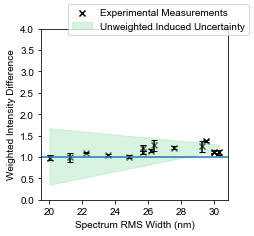

In [13]:
centim = 1/2.54
fig_id_quick = plt.figure(figsize=(8.5*centim,8*centim))
# ax_id_quick = fig_id_quick.add_subplot(121)
ax_id_rms = fig_id_quick.add_subplot(111)
# ax_id_quick.scatter(np.arange(1,16), combined, color='black', marker='x' )
# ax_id_quick.errorbar(np.arange(1,16), combined, yerr=combined_unweight, fmt='none', ecolor='black', capsize=3)
# ax_id_quick.scatter(np.arange(1,16), set_2_df.Id, color='black', marker='x' )
# ax_id_quick.set_ylim(0,1.5)
# ax_id_rms.scatter(rms_list, np.mean(combining, axis=0)- combined_unweight)
# ax_id_rms.scatter(rms_list, np.mean(combining, axis=0)+ combined_unweight)
poly_order = 1
poly_fit_top = np.poly1d(np.polyfit(rms_list, np.mean(combining,axis=0)+3*np.abs(combined_unweight), poly_order))
poly_fit_bot = np.poly1d(np.polyfit(rms_list, np.mean(combining,axis=0)-3*np.abs(combined_unweight), poly_order))

ax_id_rms.scatter(rms_list, np.mean(combining,axis=0), color='black', marker='x', label='Experimental Measurements')
ax_id_rms.errorbar(rms_list, np.mean(combining,axis=0), yerr=np.std(combining, axis=0), fmt='none', ecolor='black', capsize=3)
# ax_id_rms.fill_between(rms_list,np.mean(combining,axis=0)-np.abs(combined_unweight), np.mean(combining,axis=0)+np.abs(combined_unweight), alpha=0.45, color=color_theme[1], label='Unweighted Induced Uncertainty')
ax_id_rms.fill_between(rms_list,poly_fit_bot(rms_list), poly_fit_top(rms_list), alpha=0.45, color=color_theme[1], label='Unweighted Induced Uncertainty')
ax_id_rms.set_ylabel('Weighted Intensity Difference')
ax_id_rms.set_xlabel('Spectrum RMS Width (nm)')
# ax_id_rms.invert_xaxis()
# ax_id_rms.scatter(rms_list, set_2_df.Id, color='black', marker='x' )
# ax_id_rms.errorbar(rms_list, set_2_df.Id, yerr=set_2_df.Unweighted, fmt='none', ecolor='black', capsize=3)
# ax_id_rms.scatter(rms_list, set_3_df.Id, color='black', marker='x' )
# ax_id_rms.errorbar(rms_list, set_3_df.Id, yerr=set_3_df.Unweighted, fmt='none', ecolor='black', capsize=3)
ax_id_rms.axhline(1.0)
ax_id_rms.set_ylim(0,4.0)
fig_id_quick.legend()

In [63]:
print(len(np.mean(combining,axis=0)))
print([np.mean(combining,axis=0)[:i+1] for i in range(125)])
print([wavelengths_list_of_list[i] for i in range(15)])
print(rms_list[:18])

15
[array([1.1065464]), array([1.1065464 , 1.12585323]), array([1.1065464 , 1.12585323, 1.11543462]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871, 1.24938131]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871, 1.24938131,
       1.22143024]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871, 1.24938131,
       1.22143024, 1.26985809]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871, 1.24938131,
       1.22143024, 1.26985809, 1.2096763 ]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871, 1.24938131,
       1.22143024, 1.26985809, 1.2096763 , 1.10687683]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871, 1.24938131,
       1.22143024, 1.26985809, 1.2096763 , 1.10687683, 1.14872428]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871, 1.24938131,
       1.22143024, 1.26985809, 1.2096763 , 1.10687683, 1.14872428,
       1.0083348 ]), array([1.1065464 , 1.12585323, 1.11543462, 1.38257871, 1.

In [64]:
# def make_video_point_by_point(rms_width_list, winding_list, error_list, fname, frame_no):#, id_df):
#     fig = plt.figure()
#     fig.set_dpi(800)
#     fig.set_size_inches(5,4)#8*centim, 8*centim)
def make_video_point_by_point(wavelength_list, intensities_list, rms_width_list, winding_list, error_list, fname, frame_no):#, id_df):
    fig = plt.figure()
    fig.set_dpi(400)
    fig.set_size_inches(6,4)#8*centim, 8*centim)

    ax_spec = fig.add_subplot(121)
    ax_wind = fig.add_subplot(122)

    ax_spec.set_xlim(550,750)
    ax_spec.set_ylim(np.min(intensities_list), 0.01)#np.max(intensities_list/np.sum(intensities_list, axis=1))+1e-2)
    ax_wind.set_xlim(19, 31)
    ax_wind.set_ylim(-0.25, 3)

    def init():
        ax_spec.plot(wavelength_list[0], intensities_list[0]/np.sum(intensities_list[0]))
        # # ax.set_title('0 Rotations')#, Winding: {}, Unweighted: {}'.format(id_df.Id[0],id_df.Unweighted[0]))
        ax_spec.set_xlabel('Wavelength (nm)', fontsize=14)
        ax_spec.set_ylabel('Normalised Intensity (arb)', fontsize=14)
        ax_spec.yaxis.set_major_formatter(formatter) 
        ax_wind.scatter(rms_width_list[0], winding_list[0], color='black', marker='x', label='Experimental Measurements', s=90)
        ax_wind.errorbar(rms_width_list[0], winding_list[0], yerr=error_list[0], fmt='none', ecolor='black', capsize=5)
        ax_wind.axhline(1.0, 0,1, linestyle='--', color='red')
        ax_wind.axhline(0.0, 0,1, linestyle='--', color='gray')
        # ax.set_title('0 Rotations')#, Winding: {}, Unweighted: {}'.format(id_df.Id[0],id_df.Unweighted[0]))
        ax_wind.set_xlabel('Spectral Width (nm)', fontsize=14)
        ax_wind.set_ylabel(r'$\nu$', fontsize=14)
        ax_wind.set_xticks(np.arange(20,32,2))
        ax_wind.set_yticks(np.arange(0,3.5,0.5))

    def animate(i):
        ax_spec.clear()
        ax_wind.clear()
        # ax = plt.axes(xlim=(500, 800), ylim=(min(intensities_list), max(intensities_list)))
        
        ax_spec.plot(wavelength_list[i], intensities_list[i]/np.sum(intensities_list[i]))
        # # ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
        ax_spec.set_xlim([550, 750])
        ax_spec.set_ylim([np.min(intensities_list), 0.01])#np.max(intensities_list/np.sum(intensities_list, axis=1))+1e-2])
        ax_spec.set_xlabel('Wavelength (nm)', fontsize=14)
        ax_spec.set_ylabel('Normalised Intensity (arb)', fontsize=14)
        ax_spec.yaxis.set_major_formatter(formatter) 
        ax_wind.scatter(rms_width_list[:i+1], winding_list[:i+1], color='black', marker='x', label='Experimental Measurements', s=90)
        ax_wind.errorbar(rms_width_list[:i+1], winding_list[:i+1], yerr=error_list[:i+1], fmt='none', ecolor='black', capsize=4)
        ax_wind.axhline(1.0, 0,1, linestyle='--')
        ax_wind.axhline(0.0, 0,1, linestyle='--', color='gray')
        # ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
        ax_wind.set_xlim([19, 31])
        ax_wind.set_ylim([-0.25, 3])
        ax_wind.set_xlabel('Spectral Width (nm)', fontsize=14)
        ax_wind.set_ylabel(r'$\nu$', fontsize=14)
        ax_wind.set_xticks(np.arange(20,32,2))
        ax_wind.set_yticks(np.arange(0,3.5,0.5))
    # ax = plt.axes(xlim=(19, 31), ylim=(-0.5, 3))

    # def init():
    #     ax.scatter(rms_width_list[0], winding_list[0], color='black', marker='x', label='Experimental Measurements', s=80)
    #     ax.errorbar(rms_width_list[0], winding_list[0], yerr=error_list[0], fmt='none', ecolor='black', capsize=3)
    #     ax.axhline(1.0, 0,1, linestyle='--', color='red')
    #     ax.axhline(0.0, 0,1, linestyle='--', color='gray')
    #     # ax.set_title('0 Rotations')#, Winding: {}, Unweighted: {}'.format(id_df.Id[0],id_df.Unweighted[0]))
    #     ax.set_xlabel('Spectral Width (nm)', fontsize=12)
    #     ax.set_ylabel(r'$\nu$', fontsize=12)
    #     ax.set_xticks(np.arange(20,32,2))
    #     # ax.yaxis.set_major_formatter(formatter) 

    # def animate(i):
    #     ax.clear()
    #     # ax = plt.axes(xlim=(500, 800), ylim=(min(intensities_list), max(intensities_list)))
    #     ax.scatter(rms_width_list[:i+1], winding_list[:i+1], color='black', marker='x', label='Experimental Measurements', s=80)
    #     ax.errorbar(rms_width_list[:i+1], winding_list[:i+1], yerr=error_list[:i+1], fmt='none', ecolor='black', capsize=3)
    #     ax.axhline(1.0, 0,1, linestyle='--')
    #     ax.axhline(0.0, 0,1, linestyle='--', color='gray')
    #     # ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
    #     ax.set_xlim([19, 31])
    #     ax.set_ylim([-0.5, 3])
    #     ax.set_xlabel('Spectral Width (nm)', fontsize=12)
    #     ax.set_ylabel(r'$\nu$', fontsize=12)
    #     ax.set_xticks(np.arange(20,32,2))
    #     # ax.yaxis.set_major_formatter(formatter) 

    anim = animation.FuncAnimation(fig, animate, 
                                init_func=init, 
                                frames=frame_no, 
                                interval=3000,
                                blit=False,
                                save_count=frame_no,
                                repeat=True)
    writervideo = animation.FFMpegWriter(fps=1)
    
    plt.axis('off')
    anim.save('../Propagation Videos/'+fname, writer=writervideo)
    
    plt.close()
    return 

In [65]:
make_video_point_by_point(wavelengths_list_of_list, intensities_list_of_list, rms_list, np.mean(combining,axis=0), np.std(combining, axis=0), 'Winding against width video.mp4', 15)

In [16]:
print(rms_list[0])

30.327226571265676


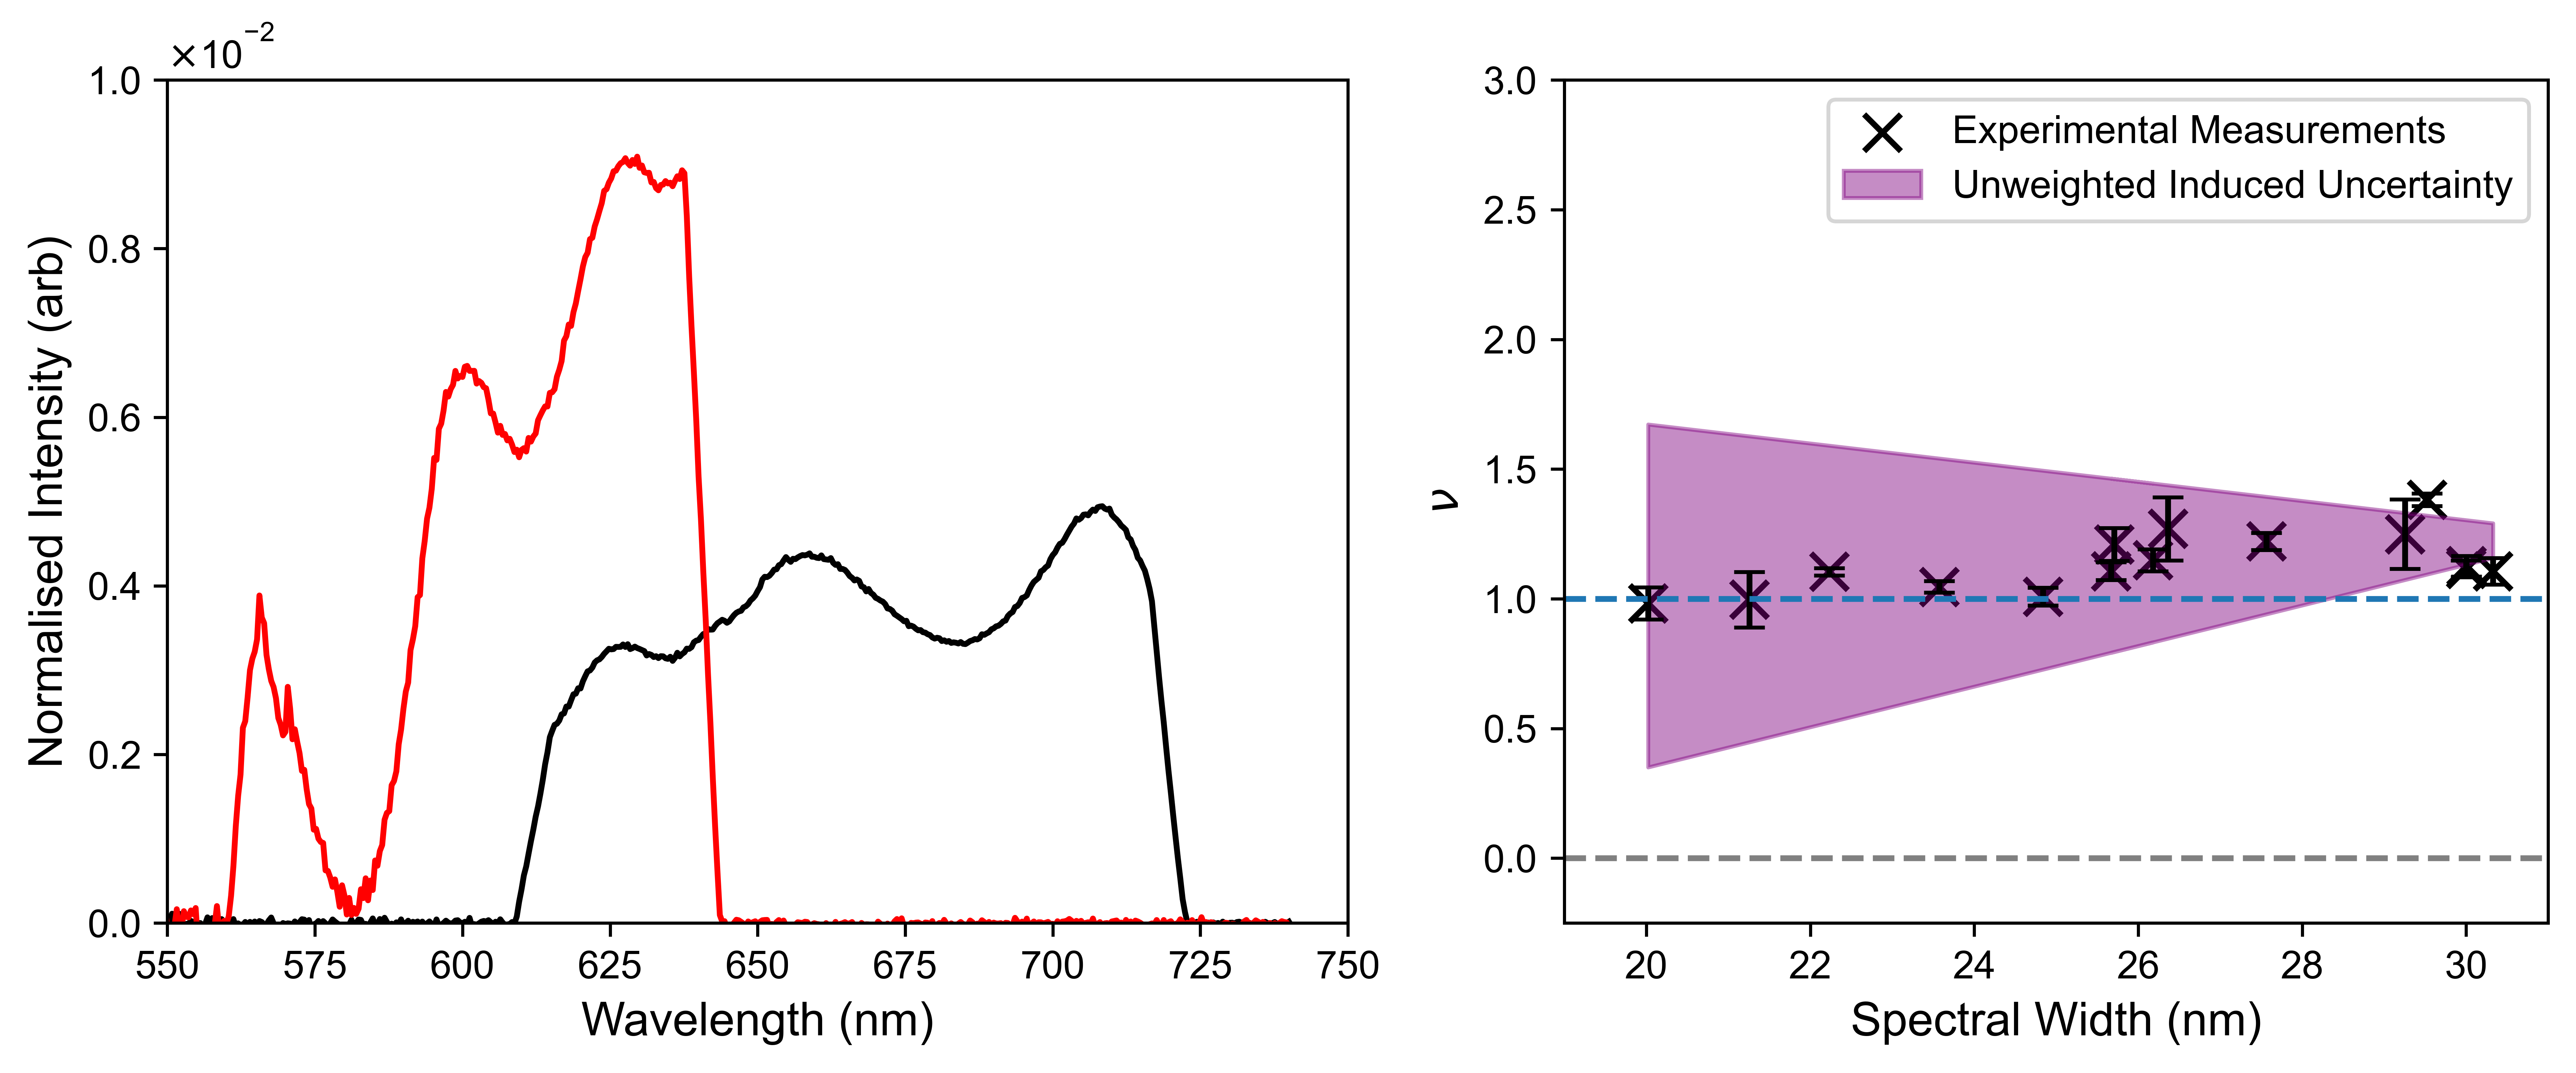

In [88]:
fig_for_pres, (ax_two_spectra, ax_for_pres) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 5]})
fig_for_pres.set_dpi(800)
fig_for_pres.set_size_inches(11,4)#8*centim, 8*centim)

ax_for_pres.scatter(rms_list, np.mean(combining,axis=0), color='black', marker='x', label='Experimental Measurements', s=90)
ax_for_pres.errorbar(rms_list, np.mean(combining,axis=0), yerr=np.std(combining, axis=0), fmt='none', ecolor='black', capsize=4)
ax_for_pres.axhline(1.0, 0,1, linestyle='--')
ax_for_pres.axhline(0.0, 0,1, linestyle='--', color='gray')
# ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
ax_for_pres.set_xlim([19, 31])
ax_for_pres.set_ylim([-0.25, 3])
ax_for_pres.set_yticks(np.arange(0,3.5, 0.5))
ax_for_pres.set_xlabel('Spectral Width (nm)', fontsize=12)
ax_for_pres.set_ylabel(r'$\nu$', fontsize=12)
ax_for_pres.set_xticks(np.arange(20,32,2))
poly_order = 1
poly_fit_top = np.poly1d(np.polyfit(rms_list, np.mean(combining,axis=0)+3*np.abs(combined_unweight), poly_order))
poly_fit_bot = np.poly1d(np.polyfit(rms_list, np.mean(combining,axis=0)-3*np.abs(combined_unweight), poly_order))
ax_for_pres.fill_between(rms_list,poly_fit_bot(rms_list), poly_fit_top(rms_list), alpha=0.45, color='purple', label='Unweighted Induced Uncertainty')
ax_for_pres.legend()
ax_two_spectra.plot(wavelengths_list_of_list[0], intensities_list_of_list[0]/np.sum(intensities_list_of_list[0]), color='black')
ax_two_spectra.plot(wavelengths_list_of_list[-1], intensities_list_of_list[-1]/np.sum(intensities_list_of_list[-1]), color='red')
# ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
ax_two_spectra.set_xlim([550, 750])
ax_two_spectra.set_ylim([np.min(intensities_list_of_list[0]), 0.01])
ax_two_spectra.set_xlabel('Wavelength (nm)', fontsize=12)
ax_two_spectra.set_ylabel('Normalised Intensity (arb)', fontsize=12)
ax_two_spectra.yaxis.set_major_formatter(formatter) 
fig_for_pres.savefig('../Single Shot Paper/fig2 for pres.png', dpi=800)
plt.show()

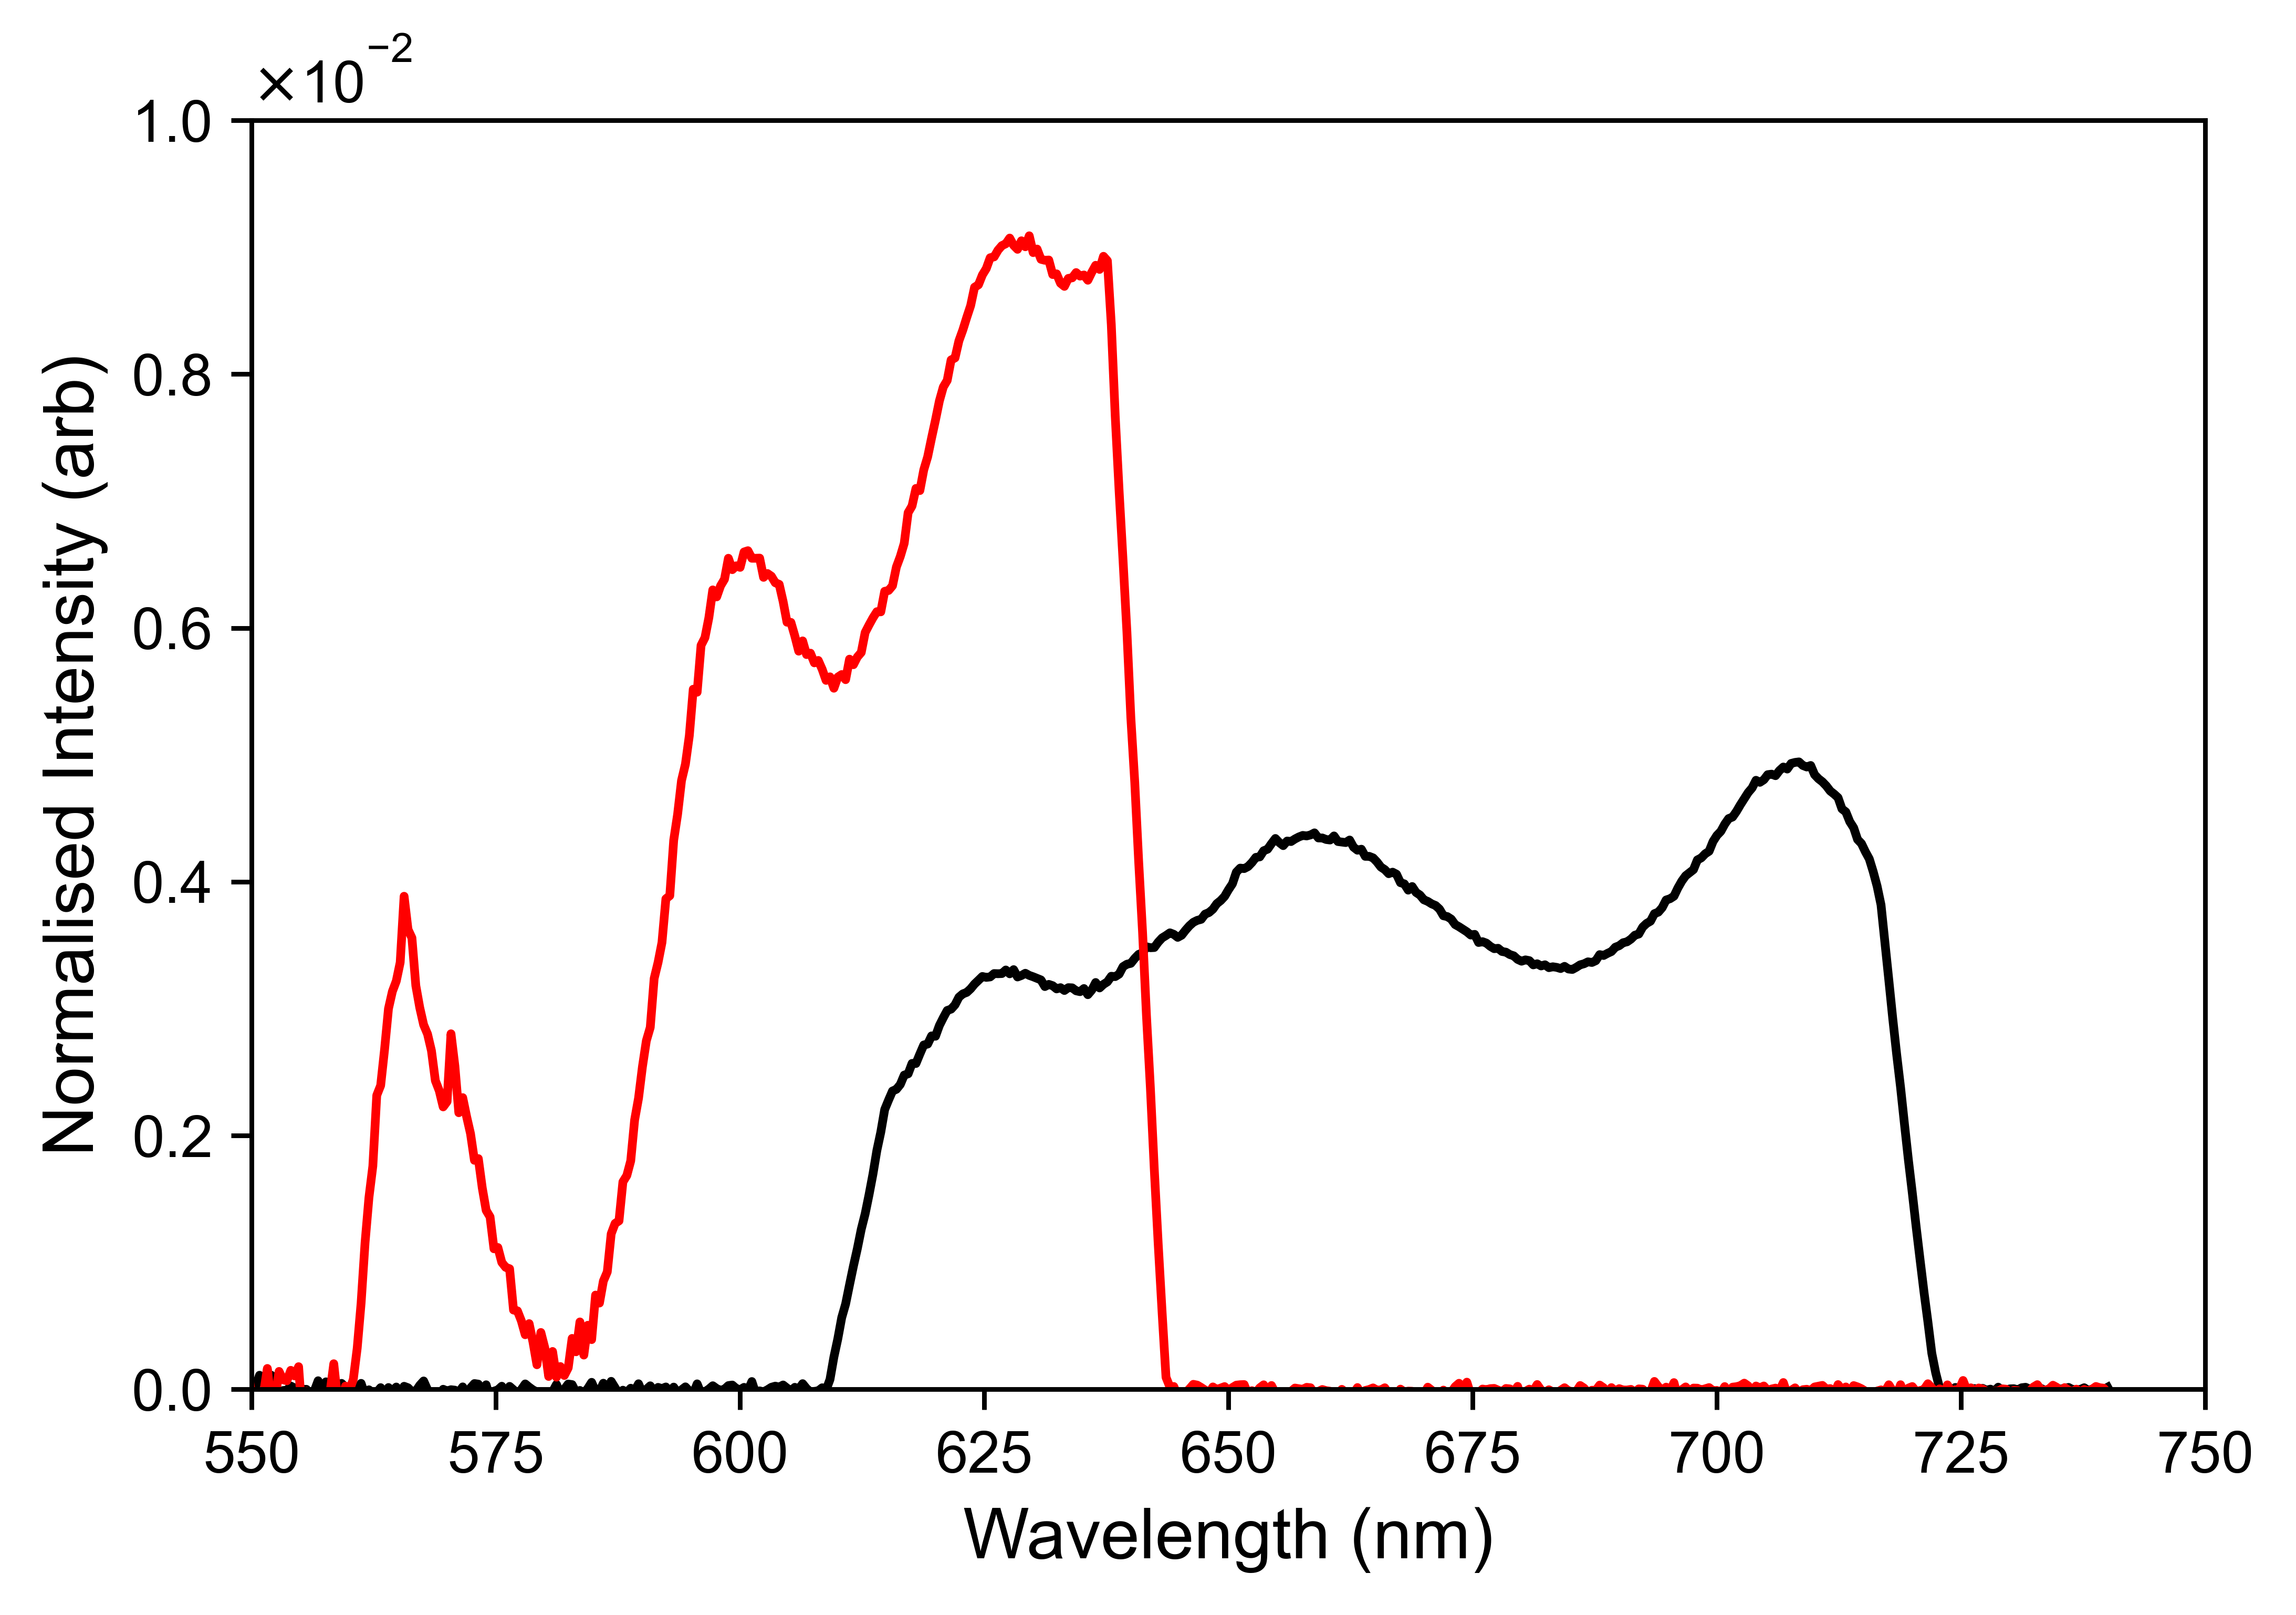

In [84]:
fig_two_spectra = plt.figure()


fig_two_spectra.set_dpi(800)
fig_two_spectra.set_size_inches(6,4)#8*centim, 8*centim)
ax_two_spectra = fig_two_spectra.add_subplot(111)
# ax = plt.axes(xlim=(500, 800), ylim=(min(intensities_list), max(intensities_list)))
ax_two_spectra.plot(wavelengths_list_of_list[0], intensities_list_of_list[0]/np.sum(intensities_list_of_list[0]), color='black')
ax_two_spectra.plot(wavelengths_list_of_list[-1], intensities_list_of_list[-1]/np.sum(intensities_list_of_list[-1]), color='red')
# ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
ax_two_spectra.set_xlim([550, 750])
ax_two_spectra.set_ylim([np.min(intensities_list_of_list[0]), 0.01])
ax_two_spectra.set_xlabel('Wavelength (nm)', fontsize=12)
ax_two_spectra.set_ylabel('Normalised Intensity (arb)', fontsize=12)
ax_two_spectra.yaxis.set_major_formatter(formatter) 

plt.show()
fig_two_spectra.savefig('../Single Shot Paper/Two spectra plot for pres.png', dpi=800)



Making Combination video so powerpoint doesn't mess up

In [80]:
def make_video_combi(wavelength_list, intensities_list, rms_width_list, winding_list, error_list, fname, frame_no):#, id_df):
    fig, (ax_spec, ax_wind) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 5]})
    fig.set_dpi(400)
    fig.set_size_inches(11, 4)
    # ax_spec = fig.add_subplot(121)
    # ax_wind = fig.add_subplot(122)

    ax_spec.set_xlim(550,750)
    ax_spec.set_ylim(np.min(intensities_list), 0.01)#np.max(intensities_list/np.sum(intensities_list, axis=1))+1e-2)
    ax_wind.set_xlim(19, 31)
    ax_wind.set_ylim(-0.25, 3)

    def init():
        ax_spec.plot(wavelength_list[0], intensities_list[0]/np.sum(intensities_list[0]))
        # ax.set_title('0 Rotations')#, Winding: {}, Unweighted: {}'.format(id_df.Id[0],id_df.Unweighted[0]))
        ax_spec.set_xlabel('Wavelength (nm)', fontsize=12)
        ax_spec.set_ylabel('Normalised Intensity (arb)', fontsize=12)
        ax_spec.yaxis.set_major_formatter(formatter) 
        ax_wind.scatter(rms_width_list[0], winding_list[0], color='black', marker='x', label='Experimental Measurements', s=90)
        ax_wind.errorbar(rms_width_list[0], winding_list[0], yerr=error_list[0], fmt='none', ecolor='black', capsize=4)
        ax_wind.axhline(1.0, 0,1, linestyle='--', color='red')
        ax_wind.axhline(0.0, 0,1, linestyle='--', color='gray')
        # ax.set_title('0 Rotations')#, Winding: {}, Unweighted: {}'.format(id_df.Id[0],id_df.Unweighted[0]))
        ax_wind.set_xlabel('Spectral Width (nm)', fontsize=12)
        ax_wind.set_ylabel(r'$\nu$', fontsize=12)
        ax_wind.set_xticks(np.arange(20,32,2))
        ax_wind.set_yticks(np.arange(0,3.5,0.5))

    def animate(i):
        ax_spec.clear()
        ax_wind.clear()
        # ax = plt.axes(xlim=(500, 800), ylim=(min(intensities_list), max(intensities_list)))
        
        ax_spec.plot(wavelength_list[i], intensities_list[i]/np.sum(intensities_list[i]))
        # ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
        ax_spec.set_xlim([550, 750])
        ax_spec.set_ylim([np.min(intensities_list), 0.01])#np.max(intensities_list/np.sum(intensities_list, axis=1))+1e-2])
        ax_spec.set_xlabel('Wavelength (nm)', fontsize=12)
        ax_spec.set_ylabel('Normalised Intensity (arb)', fontsize=12)
        ax_spec.yaxis.set_major_formatter(formatter) 
        
        ax_wind.scatter(rms_width_list[:i+1], winding_list[:i+1], color='black', marker='x', label='Experimental Measurements', s=90)
        ax_wind.errorbar(rms_width_list[:i+1], winding_list[:i+1], yerr=error_list[:i+1], fmt='none', ecolor='black', capsize=4)
        ax_wind.axhline(1.0, 0,1, linestyle='--')
        ax_wind.axhline(0.0, 0,1, linestyle='--', color='gray')
        # ax.set_title('{} Rotations'.format(i))#, Winding: {}, Unweighted: {}'.format(i, np.round(id_df.Id[i],2), np.round(id_df.Unweighted[i],2)))
        ax_wind.set_xlim([19, 31])
        ax_wind.set_ylim([-0.25, 3])
        ax_wind.set_xlabel('Spectral Width (nm)', fontsize=12)
        ax_wind.set_ylabel(r'$\nu$', fontsize=12)
        ax_wind.set_xticks(np.arange(20,32,2))
        ax_wind.set_yticks(np.arange(0,3.5,0.5))

    anim = animation.FuncAnimation(fig, animate, 
                                init_func=init, 
                                frames=frame_no, 
                                interval=3000,
                                blit=False,
                                save_count=frame_no,
                                repeat=True)
    writervideo = animation.FFMpegWriter(fps=1, codec='h264', bitrate=1000)
    
    plt.axis('off')
    anim.save('../Propagation Videos/'+fname, writer=writervideo)
    
    plt.close()
    return 

In [81]:
make_video_combi(wavelengths_list_of_list, intensities_list_of_list, rms_list, np.mean(combining,axis=0), np.std(combining, axis=0),'spectrum and winding video.mp4', 15)